# [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course)

## Import necessary packages

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor

## Read in data

In [2]:
train = pd.read_csv("./../../../data/hpc_train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test = pd.read_csv("./../../../data/hpc_test.csv")
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Exploratory Data Analysis

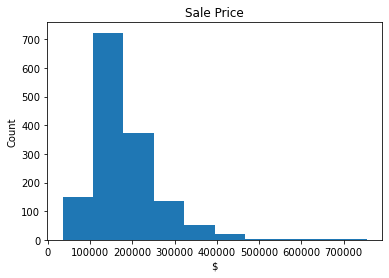

In [4]:
# the SalePrice is right skewed
plt.hist(train.SalePrice)
plt.xlabel("$")
plt.ylabel("Count")
plt.title("Sale Price")
plt.show()

In [5]:
train["SalePrice"] = np.log1p(train["SalePrice"]) # Normalising target variable

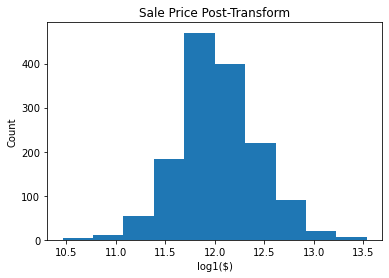

In [6]:
plt.hist(train.SalePrice)
plt.xlabel("log1($)")
plt.ylabel("Count")
plt.title("Sale Price Post-Transform")
plt.show()

In [7]:
list(train.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024057
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399449
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775105
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534474


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Categorical & Numerical features

#### Categorical

In [10]:
cat_feat = train.select_dtypes(include=[np.object])
cat_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [11]:
cat_feat.nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

#### Numerical

In [12]:
num_feat = train.select_dtypes(include=[np.number])
num_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

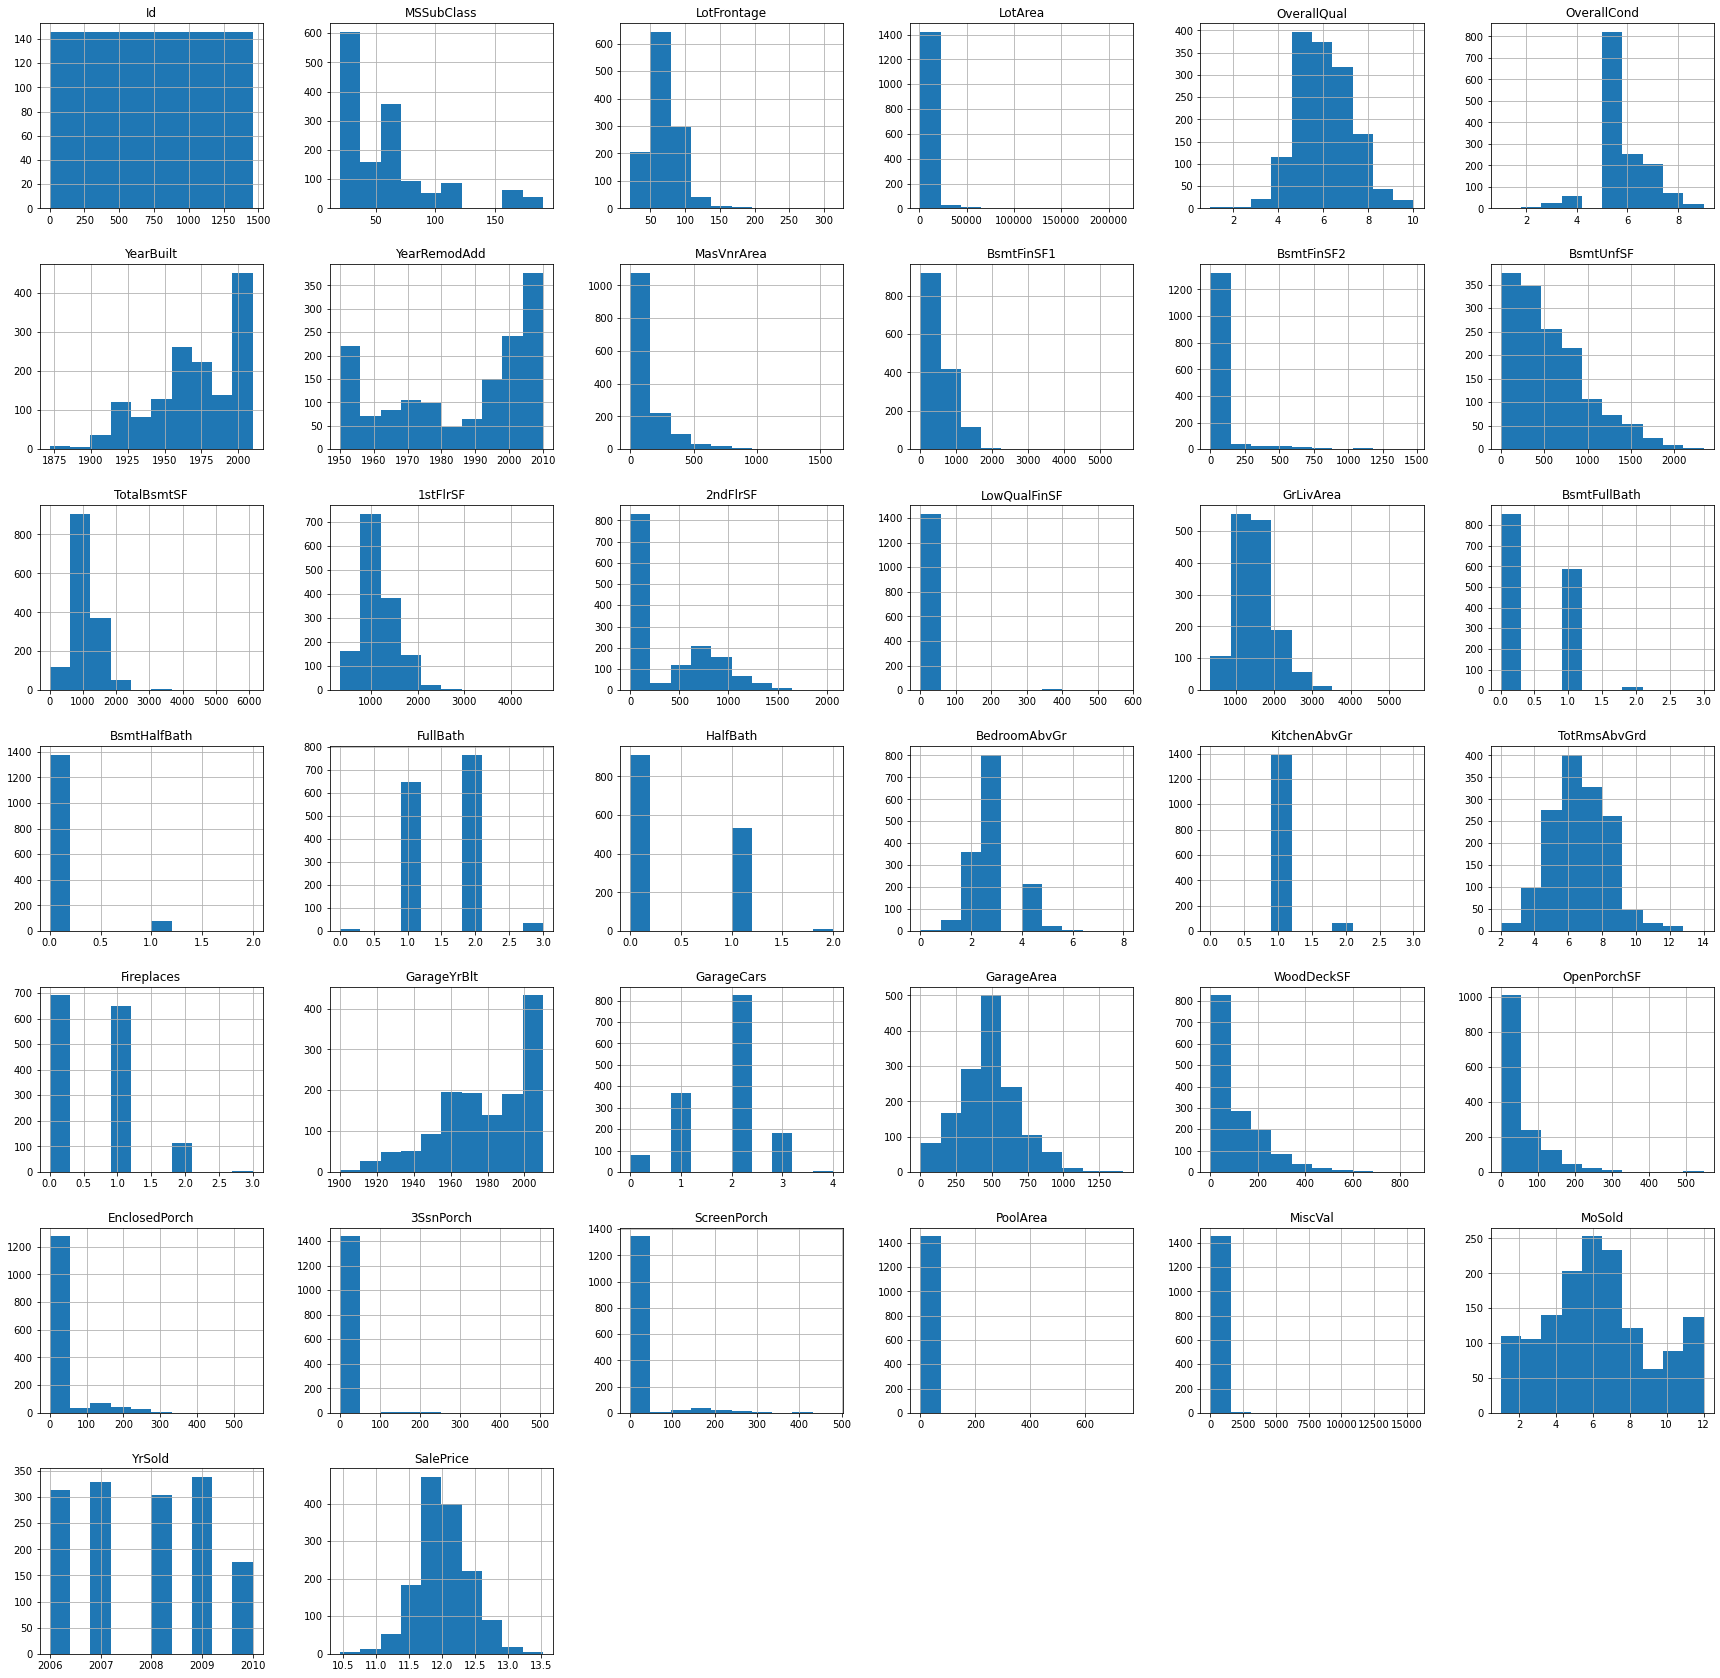

In [13]:
num_feat.hist(figsize = (30, 30))

Text(0.5, 1.0, 'Correlation Matrix of features')

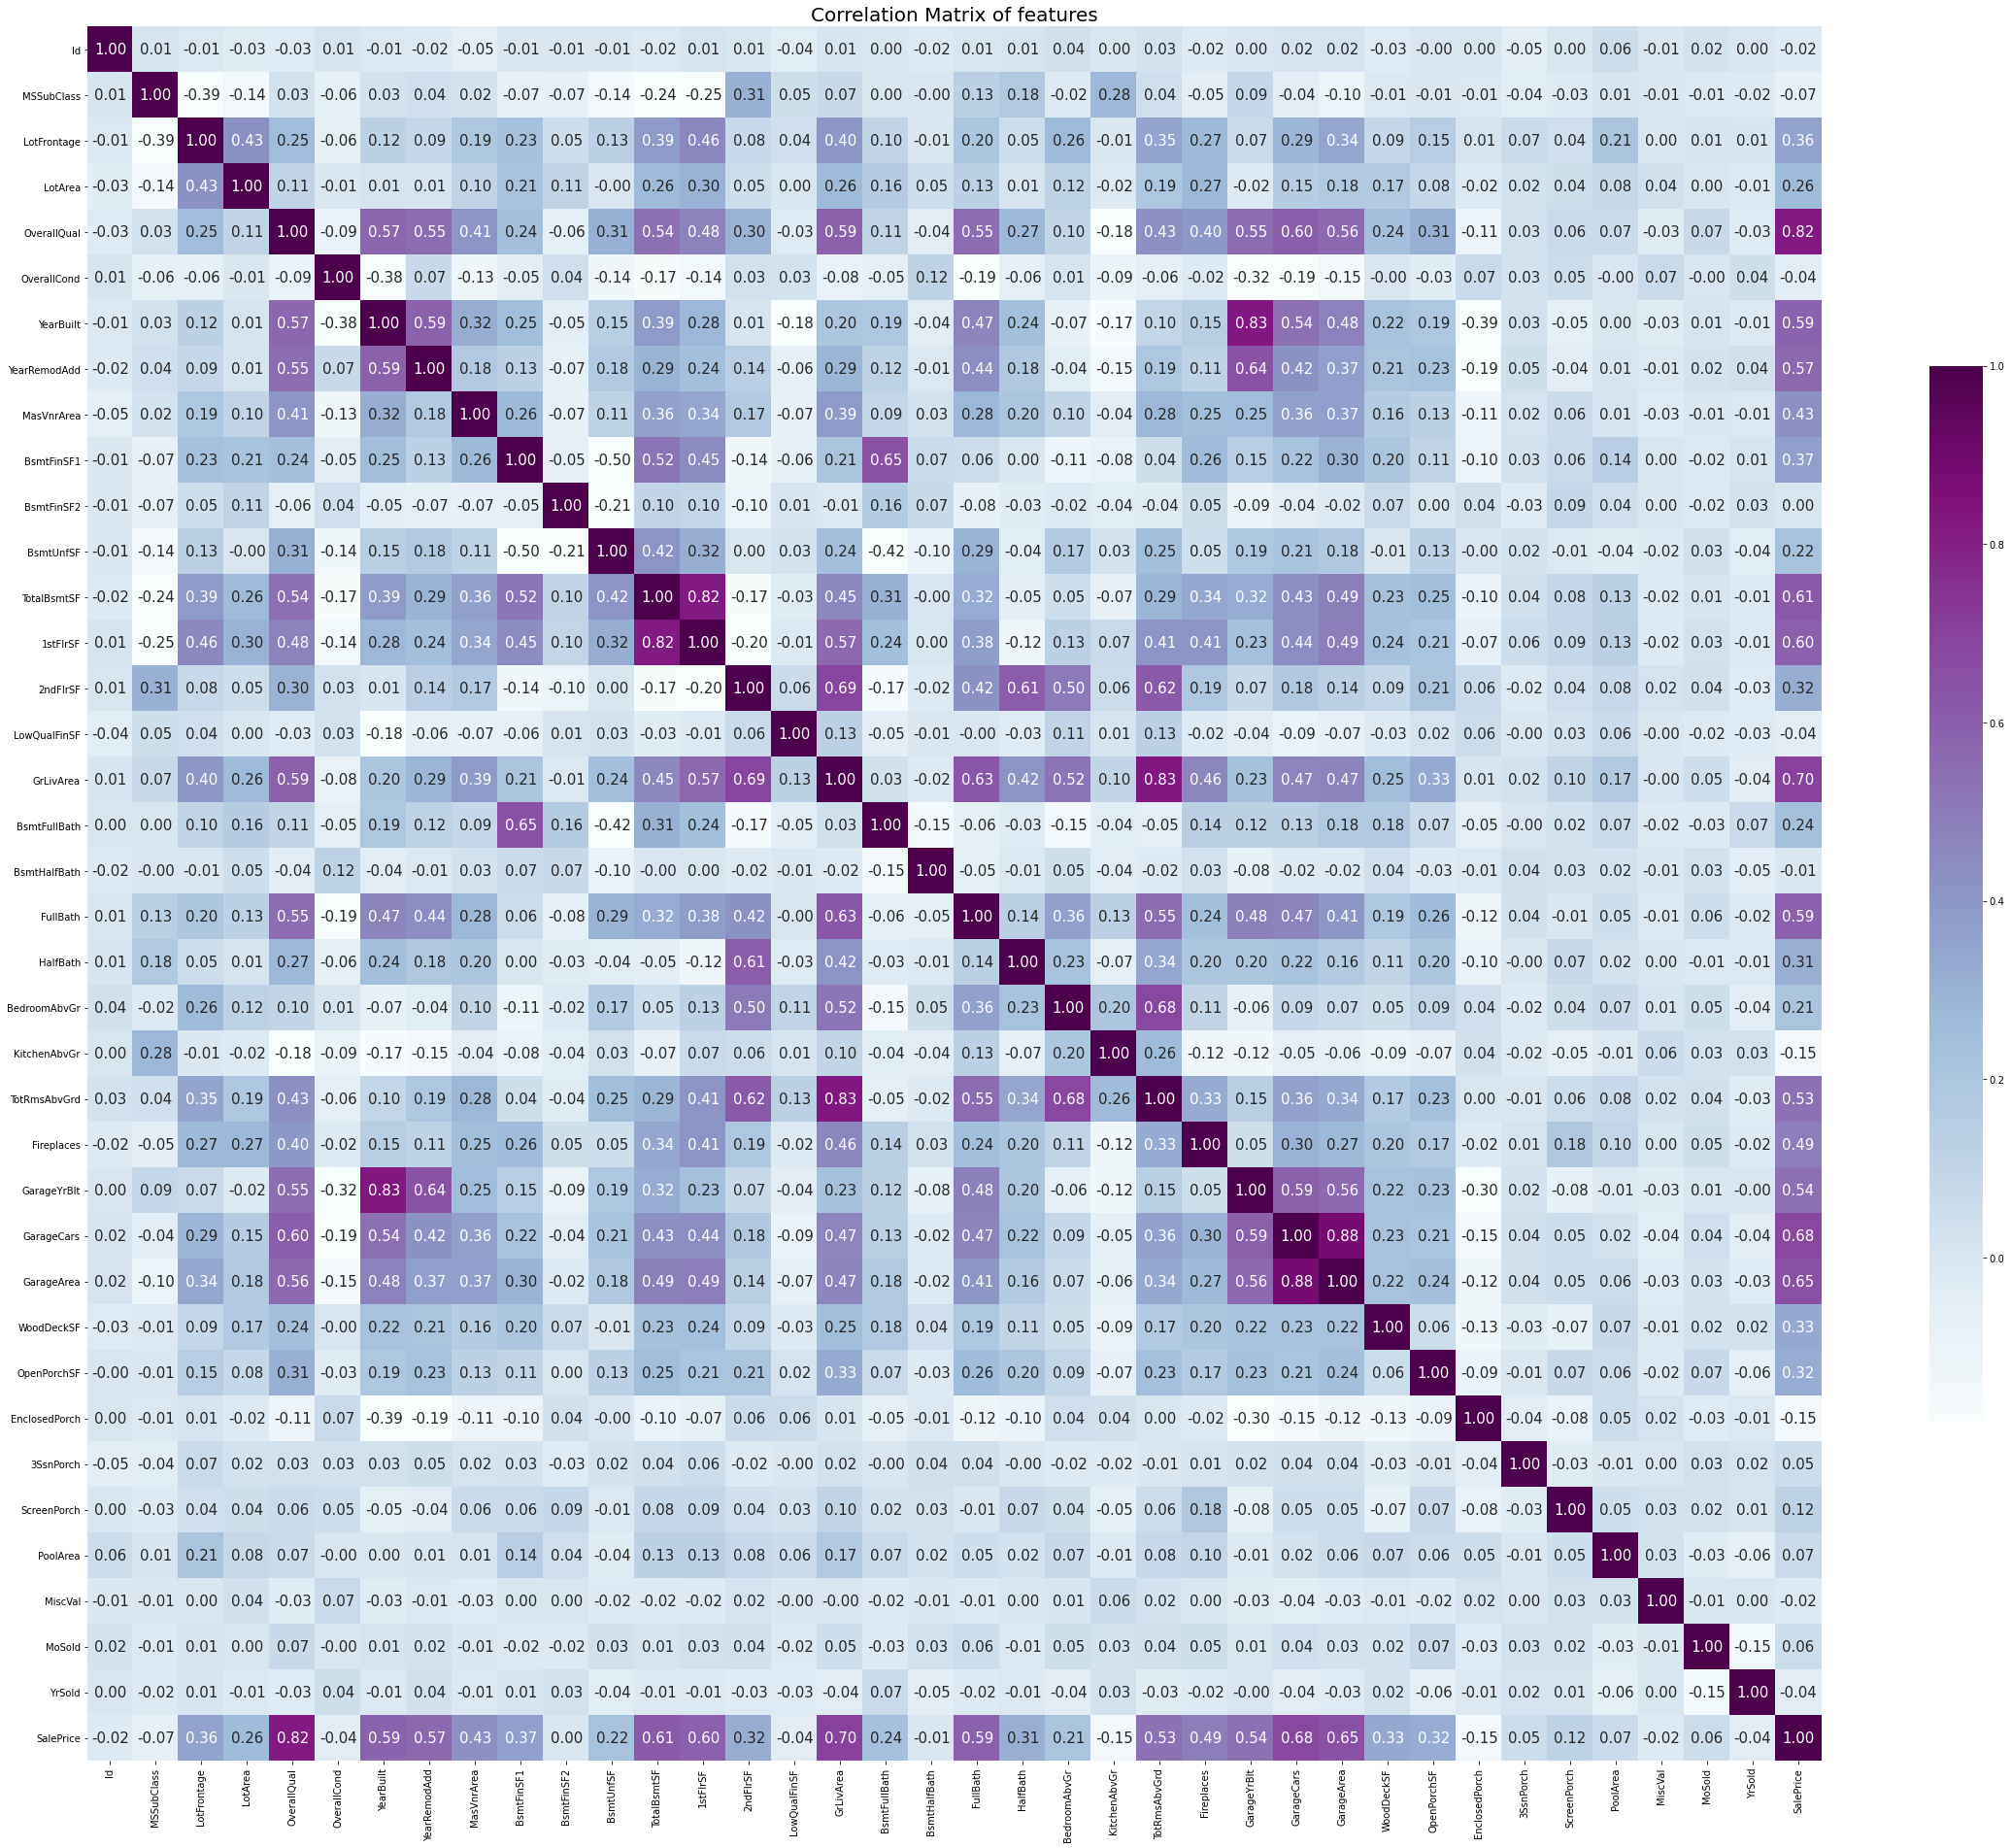

In [14]:
correlation_matrix = num_feat.corr()

plt.figure(figsize=(40, 40))

ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='BuPu',
    cbar_kws={"shrink": .5},
    annot_kws={"size": 15},
    robust=True
)

plt.title('Correlation Matrix of features', fontsize=20)

In [15]:
correlation_matrix[['SalePrice']].sort_values(['SalePrice'], ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.817185
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134
1stFlrSF,0.596981
FullBath,0.594771
YearBuilt,0.586570
YearRemodAdd,0.565608


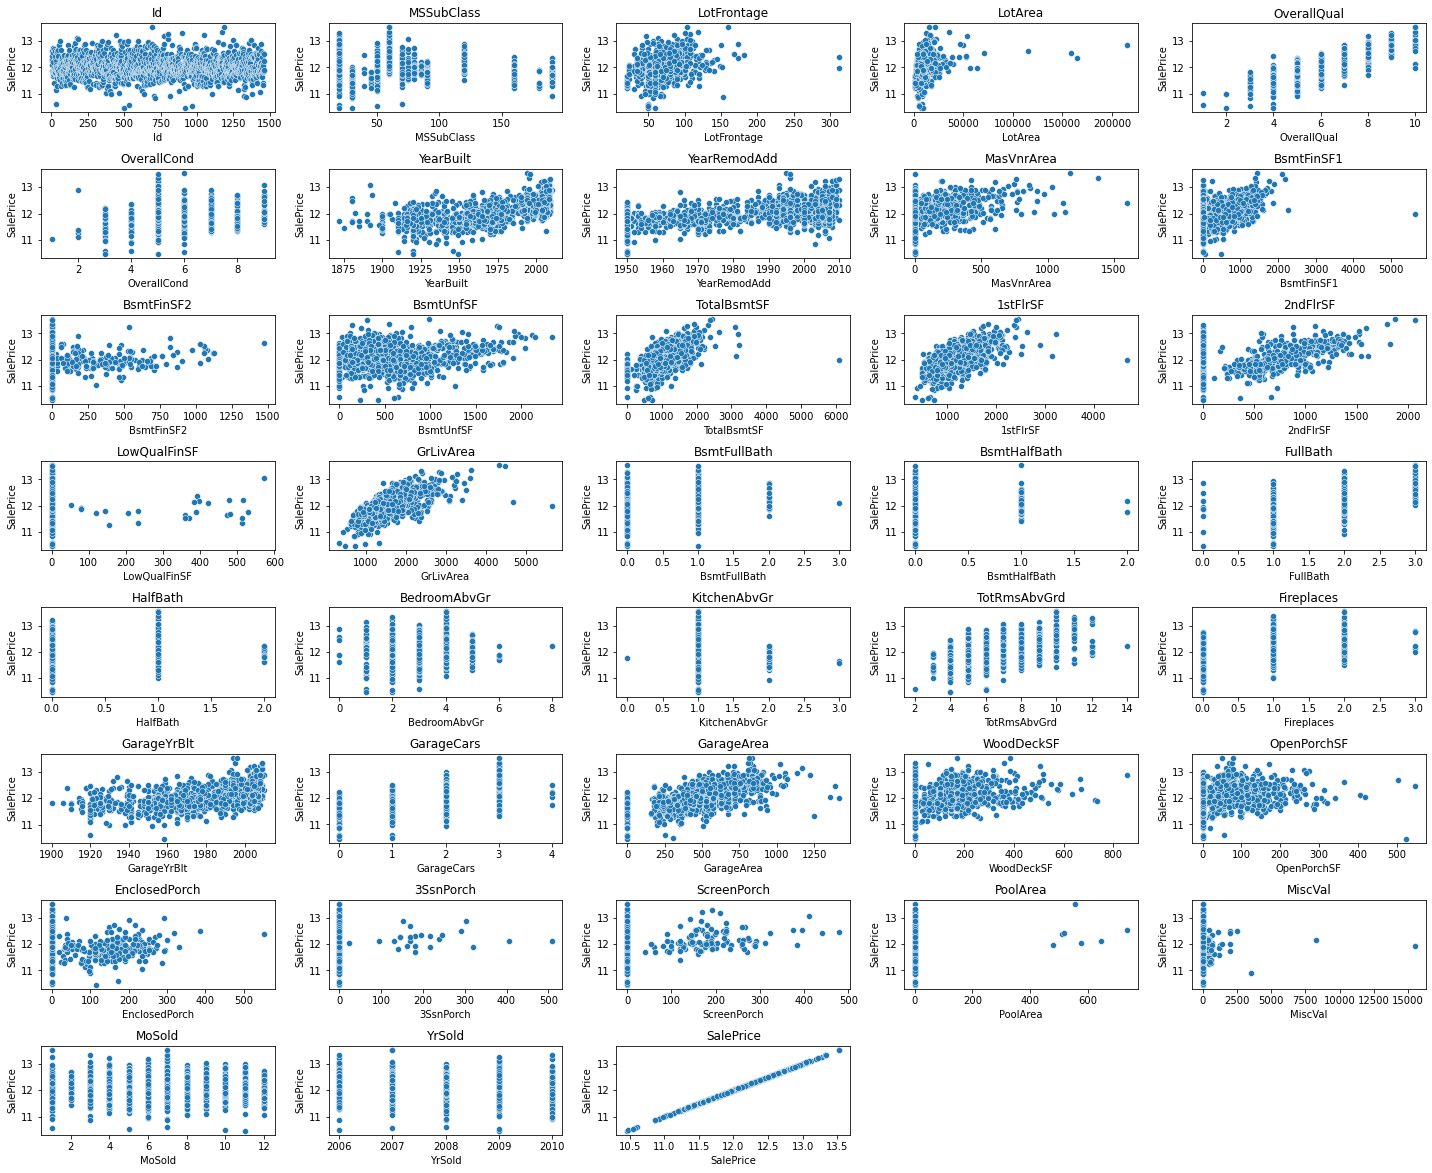

In [16]:
temp_df_num = train.select_dtypes(include = [np.number])
fig = plt.figure(figsize = (20,20))
for i in range(len(temp_df_num.columns)):
    plt.subplot(10,5, i + 1)
    sns.scatterplot(x = temp_df_num.columns[i], y = temp_df_num['SalePrice'], data = temp_df_num)
    plt.title(temp_df_num.columns[i])
fig.tight_layout(pad = 1.0)

### Missing values

In [17]:
pd.set_option('display.max_rows', 500)
display(train.isnull().sum())
pd.reset_option('display.max_rows')

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [18]:
cols_with_missing = [col for col in train.columns
                     if train[col].isnull().any()]
cols_with_missing

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

<AxesSubplot:>

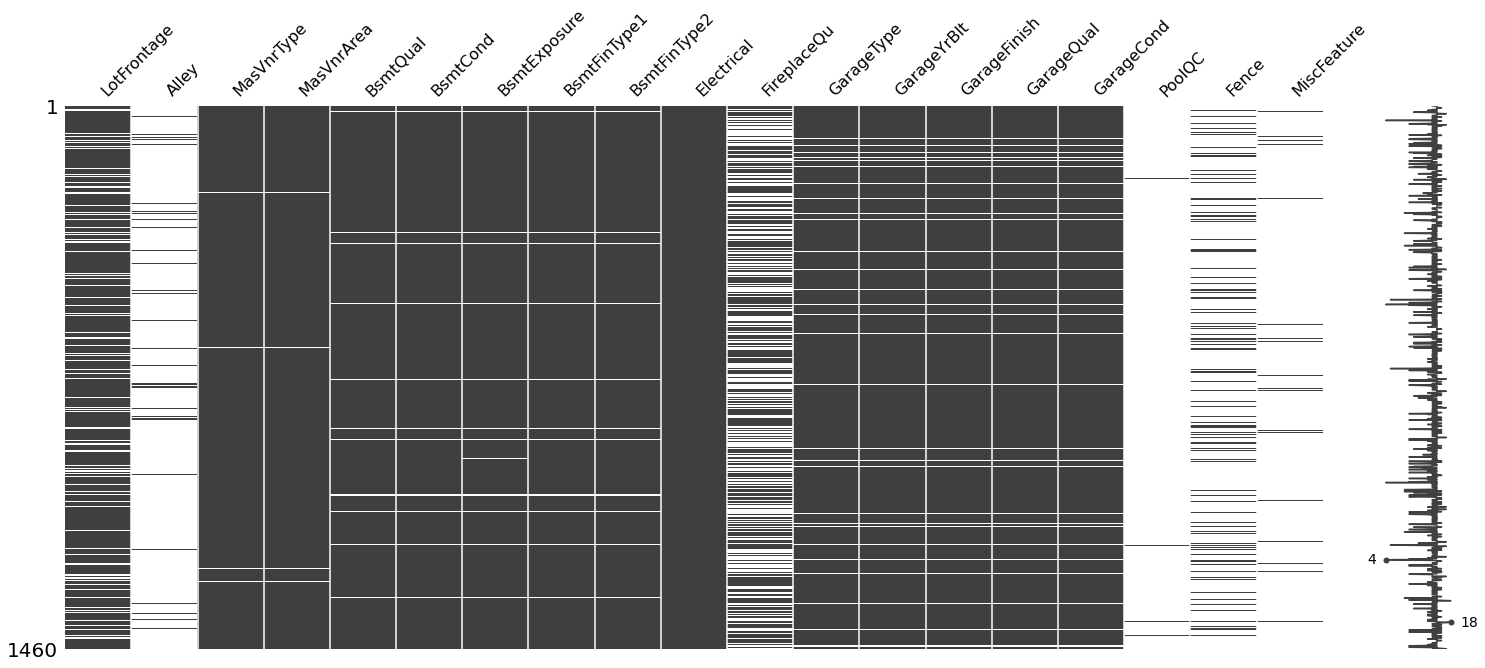

In [19]:
msno.matrix(train[cols_with_missing])

<AxesSubplot:>

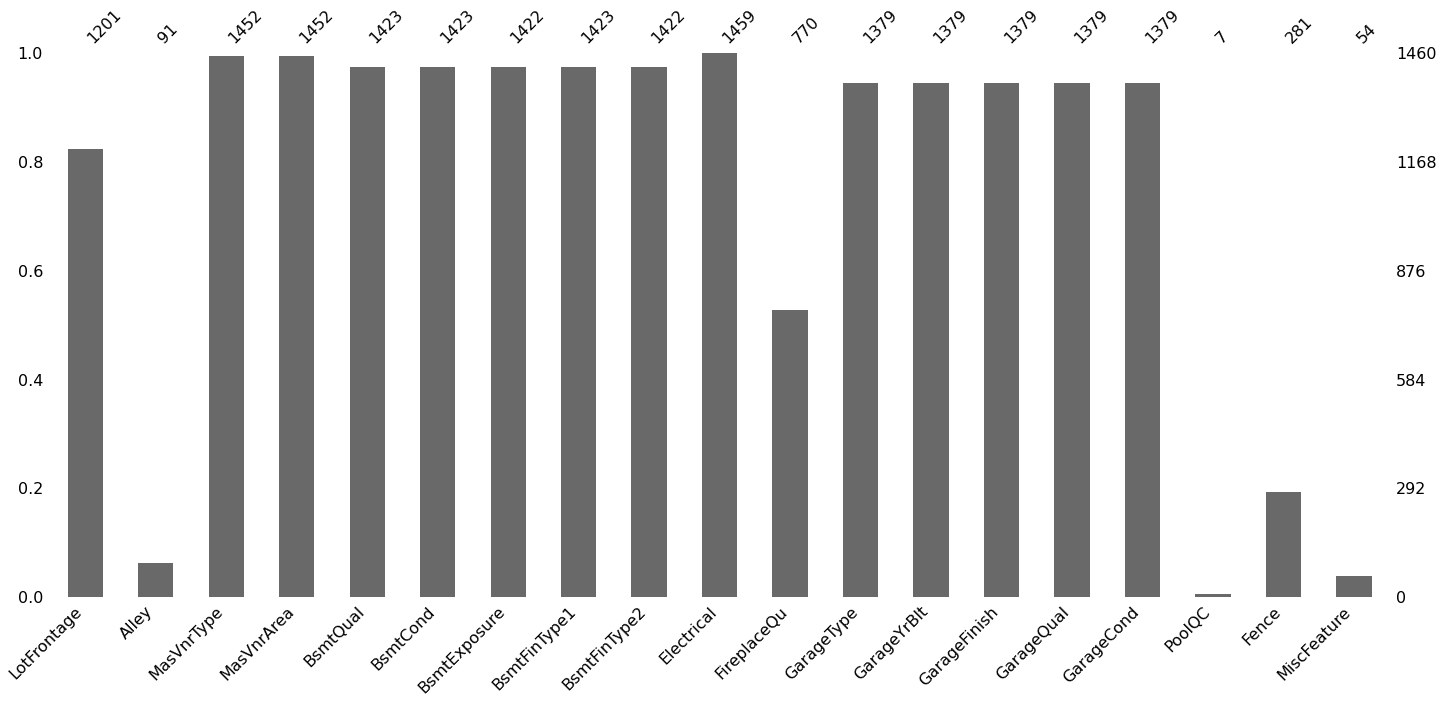

In [20]:
msno.bar(train[cols_with_missing])

In [21]:
for col_name in cols_with_missing:
    print(f'{col_name}:\n{train[col_name].unique()}\n')
    col_isna = train[col_name].isna().sum()
    col_count = train[col_name].count()
    print(f'isna: {col_isna}\n')
    print(f'count: {col_count}\n')
    print(f'%: {col_isna/(col_isna + col_count)*100}\n\n----------------------------------------\n')

LotFrontage:
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

isna: 259

count: 1201

%: 17.73972602739726

----------------------------------------

Alley:
[nan 'Grvl' 'Pave']

isna: 1369

count: 91

%: 93.76712328767123

----------------------------------------

MasVnrType:
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]

isna: 8

count: 1452

%: 0.547945205479452

----------------------------------------

MasVnrArea:
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+

## Cleaning the data

In [22]:
# features to remove due to collinearity
redun = ['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars']

train.drop(redun, axis = 1, inplace = True)
test.drop(redun, axis = 1, inplace = True)

num_feat = list(set(num_feat)-set(redun))
cat_feat = list(set(cat_feat)-set(redun))

In [23]:
useless = ['YrSold','MoSold', 'Id']

train.drop(useless, axis = 1, inplace = True)
test_id = test.Id
test.drop(useless, axis = 1, inplace = True)

num_feat = list(set(num_feat)-set(useless))
cat_feat = list(set(cat_feat)-set(useless))

In [24]:
# too sparse
sparse = ['PoolQC', 'MiscFeature', 'Alley']

train.drop(sparse, axis = 1, inplace = True)
test.drop(sparse, axis = 1, inplace = True)

num_feat = list(set(num_feat)-set(sparse))
cat_feat = list(set(cat_feat)-set(sparse))

In [25]:
# Removing outliers
train = train[train.GrLivArea < 4500] 

In [26]:
# Removing SalePrice from features
num_feat.remove("SalePrice")

In [27]:
# Specifying input variables
X_cols = num_feat + cat_feat

In [28]:
# Preprocessing for numerical data
# Replace missing numerical variables with 0
numerical_transformer = SimpleImputer(strategy='constant', fill_value = 0)

In [29]:
# Preprocessing for categorical data
# Replaces missing categorical variables with mode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [30]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_feat),
        ('cat', categorical_transformer, cat_feat)
    ])

In [31]:
# specifying target variable
y_train = train.SalePrice
y_train

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1458, dtype: float64

In [32]:
X_train = train[X_cols]
X_train

,WoodDeckSF,KitchenAbvGr,BsmtHalfBath,BsmtFinSF2,BedroomAbvGr,BsmtUnfSF,BsmtFullBath,HalfBath,MiscVal,LotFrontage,...,KitchenQual,GarageQual,Street,Condition1,Condition2,MasVnrType,Foundation,GarageType,LotConfig,Neighborhood
0,0,1,0,0,3,150,1,1,0,65.0,...,Gd,TA,Pave,Norm,Norm,BrkFace,PConc,Attchd,Inside,CollgCr
1,298,1,1,0,3,284,0,0,0,80.0,...,TA,TA,Pave,Feedr,Norm,None,CBlock,Attchd,FR2,Veenker
2,0,1,0,0,3,434,1,1,0,68.0,...,Gd,TA,Pave,Norm,Norm,BrkFace,PConc,Attchd,Inside,CollgCr
3,0,1,0,0,3,540,1,0,0,60.0,...,Gd,TA,Pave,Norm,Norm,None,BrkTil,Detchd,Corner,Crawfor
4,192,1,0,0,4,490,1,1,0,84.0,...,Gd,TA,Pave,Norm,Norm,BrkFace,PConc,Attchd,FR2,NoRidge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,0,0,3,953,0,1,0,62.0,...,TA,TA,Pave,Norm,Norm,None,PConc,Attchd,Inside,Gilbert
1456,349,1,0,163,3,589,1,0,0,85.0,...,TA,TA,Pave,Norm,Norm,Stone,CBlock,Attchd,Inside,NWAmes
1457,0,1,0,0,4,877,0,0,2500,66.0,...,Gd,TA,Pave,Norm,Norm,None,Stone,Attchd,Inside,Crawfor
1458,366,1,0,1029,2,0,1,0,0,68.0,...,Gd,TA,Pave,Norm,Norm,None,CBlock,Attchd,Inside,NAmes


In [33]:
X_test = test[X_cols]
X_test

,WoodDeckSF,KitchenAbvGr,BsmtHalfBath,BsmtFinSF2,BedroomAbvGr,BsmtUnfSF,BsmtFullBath,HalfBath,MiscVal,LotFrontage,...,KitchenQual,GarageQual,Street,Condition1,Condition2,MasVnrType,Foundation,GarageType,LotConfig,Neighborhood
0,140,1,0.0,144.0,2,270.0,0.0,0,0,80.0,...,TA,TA,Pave,Feedr,Norm,None,CBlock,Attchd,Inside,NAmes
1,393,1,0.0,0.0,3,406.0,0.0,1,12500,81.0,...,Gd,TA,Pave,Norm,Norm,BrkFace,CBlock,Attchd,Corner,NAmes
2,212,1,0.0,0.0,3,137.0,0.0,1,0,74.0,...,TA,TA,Pave,Norm,Norm,None,PConc,Attchd,Inside,Gilbert
3,360,1,0.0,0.0,3,324.0,0.0,1,0,78.0,...,Gd,TA,Pave,Norm,Norm,BrkFace,PConc,Attchd,Inside,Gilbert
4,0,1,0.0,0.0,2,1017.0,0.0,0,0,43.0,...,Gd,TA,Pave,Norm,Norm,None,PConc,Attchd,Inside,StoneBr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,1,0.0,0.0,3,546.0,0.0,1,0,21.0,...,TA,NaN,Pave,Norm,Norm,None,CBlock,NaN,Inside,MeadowV
1455,0,1,0.0,0.0,3,294.0,0.0,1,0,21.0,...,TA,TA,Pave,Norm,Norm,None,CBlock,CarPort,Inside,MeadowV
1456,474,1,0.0,0.0,4,0.0,1.0,0,0,160.0,...,TA,TA,Pave,Norm,Norm,None,CBlock,Detchd,Inside,Mitchel
1457,80,1,1.0,0.0,3,575.0,0.0,0,700,62.0,...,TA,NaN,Pave,Norm,Norm,None,PConc,NaN,Inside,Mitchel


## Modelling & Predicting

In [34]:
"""
n_estimators: The model creates decision trees, this parameter specifies the number of trees (default = 100). Higher = more granular, but greater chance of overfitting.

max_depth = The maximum tree depth (if confused, look up decision trees)

learning_rate: Used in gradient descent, controls how much the models weights change in response to errors. Too low = overfitting, too high = underfitting.

subsample: How much of the training data to randomly sample. 0.7 = 70% of training data is randomly sample each iteration.

seed: A Random Seed, set to a value to be able to replicate the same random numbers each time. Useful for testing, can observe changes.

early_stopping_rounds: Each time the model iterates it either gets better or it doesn't. In our case if it iterates 5 times and doesn't improve, the model stops training. It helps prevent overfitting.

eval_set: Selects your evaluation data. The model runs on the training data and evaluates how accurately it makes predictions during training.

Verbose: If you set it to True, it prints the evaluation metric at each boosting stage.



A lot of parameter tuning is trial and error, these are the best settings that I happened to find. It could be possible to iteratively find the optimal parameters but it would take a considerable amount of time and you may end up overfitting your model, which would result in it performing poorly when used on other data outside of the training and tesing sets.
"""

model = XGBRegressor(n_estimators = 3460,
                     max_depth = 3,
                     learning_rate = 0.01,
                     subsample = 0.7,
                     seed=1,
                     early_stopping_rounds=5,
                     eval_set=[(X_train, y_train)],
                     verbose=False)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [35]:
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, 
                y_train)

[17:46:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { early_stopping_rounds, eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['WoodDeckSF', 'KitchenAbvGr',
                                                   'BsmtHalfBath', 'BsmtFinSF2',
                                                   'BedroomAbvGr', 'BsmtUnfSF',
                                                   'BsmtFullBath', 'HalfBath',
                                                   'MiscVal', 'LotFrontage',
                                                   'YearBuilt', 'BsmtFinSF1',
                                                   'MSSubClass', 'LowQualFinSF',
                                                   'EnclosedPorch',
                                                   'ScreenPorch', 'OverallCond',...
                              gamma=0

In [36]:
# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

## Evaluating Results

In [37]:
# Validate model score
# Do this to compare changes
scores = cross_val_score(my_pipeline, X_train, y_train)
print("Model Cross-val Score: ", scores.mean())

[17:46:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { early_stopping_rounds, eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:46:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { early_stopping_rounds, eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:46:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { early_stopping_rounds

In [38]:
# Creates a dataframe with our results for submission
output = pd.DataFrame({'Id': test_id,
                       'SalePrice': preds})
output["SalePrice"] = np.expm1(output["SalePrice"])
output.to_csv('submission.csv', index=False)

### Most Important Features

Text(0.5, 0, 'Feature Name')

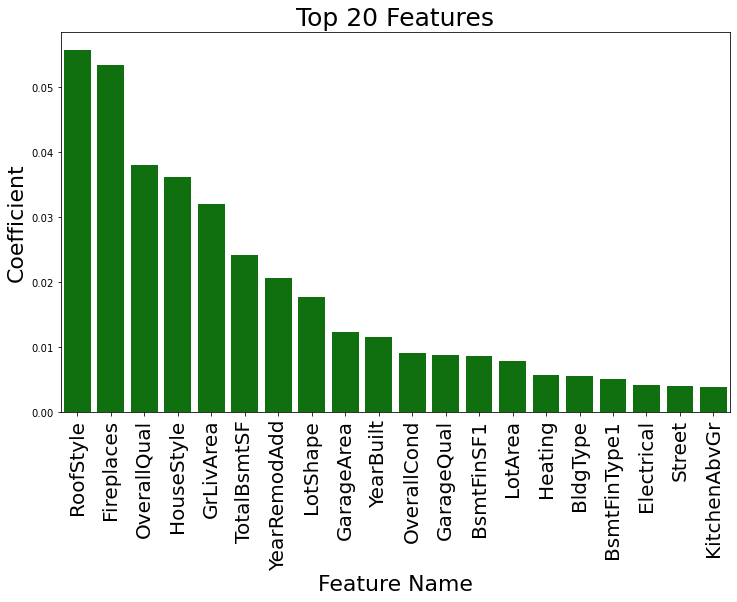

In [40]:
# Combining column names and column scores
zipped = zip(X_train.columns, my_pipeline['model'].feature_importances_)
df = pd.DataFrame(zipped, columns = ["feature", "value"])

# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coefficient", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)